# Time Series EDA

We are going to see
1. Pandas data reader- Fiancial Data
2. Data time index
3. Time resampling
4. Time Shifts
5. Mean rolling and expanding
6. Time series visualization
7. One sample project on time series

Installing Pandas datareader

In [1]:
!pip install pandas-datareader


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

Reading Tesla data from yahoo finance

In [3]:
!pip install --upgrade pandas_datareader pandas



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests
import pandas as pd

# Replace 'YOUR_API_KEY' with the actual API key obtained from Alpha Vantage
api_key = 'YOUR_API_KEY'

# Function to fetch historical stock data from Alpha Vantage
def get_alpha_vantage_data(symbol, api_key):
    base_url = 'https://www.alphavantage.co/query'
    function = 'TIME_SERIES_DAILY'  # Adjust this if you need a different time series
    params = {
        'function': function,
        'symbol': symbol,
        'apikey': api_key
    }

    # Make the API request
    response = requests.get(base_url, params=params)
    data = response.json()

    # Extract time series data from the response
    time_series_data = data.get('Time Series (Daily)')

    # Convert the data to a DataFrame
    df = pd.DataFrame(time_series_data).T
    df.index = pd.to_datetime(df.index)

    return df

# Specify the stock symbol (e.g., TSLA for Tesla)
symbol = 'TSLA'

# Fetch historical stock data for Tesla from Alpha Vantage
df_tesla = get_alpha_vantage_data(symbol, api_key)

# Display the first few rows of the DataFrame
df_tesla.head()


,1. open,2. high,3. low,4. close,5. volume
2023-12-29,255.1000,255.1900,247.4300,248.4800,100891578
2023-12-28,263.6600,265.1300,252.7100,253.1800,113619943
2023-12-27,258.3500,263.3400,257.5200,261.4400,105853348
2023-12-26,254.4900,257.9700,252.9100,256.6100,86892382
2023-12-22,256.7600,258.2200,251.3700,252.5400,93370094


In [5]:
df_tesla.tail()

,1. open,2. high,3. low,4. close,5. volume
2023-08-15,238.7300,240.5000,232.6100,232.9600,88197599
2023-08-14,235.7000,240.6600,233.7500,239.7600,98595331
2023-08-11,241.7700,243.7900,238.0200,242.6500,99038642
2023-08-10,245.4000,251.8000,243.0000,245.3400,109498608
2023-08-09,250.8700,251.1000,241.9000,242.1900,101596324


In [6]:
df_tesla.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [7]:
for column in df_tesla.columns:
    df_tesla[column] = pd.to_numeric(df_tesla[column], errors='coerce')

In [8]:
df_tesla.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume      int64
dtype: object

In [9]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-12-29 to 2023-08-09
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


<Axes: >

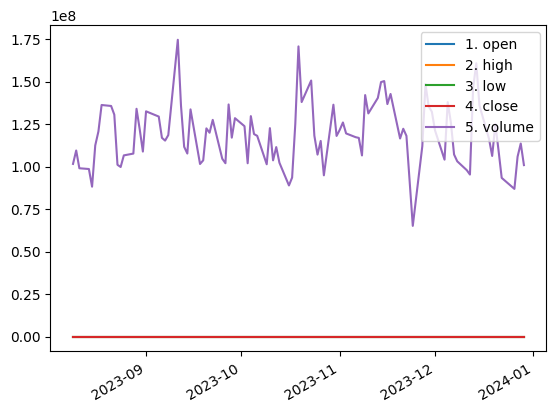

In [10]:
df_tesla.plot()

<Axes: >

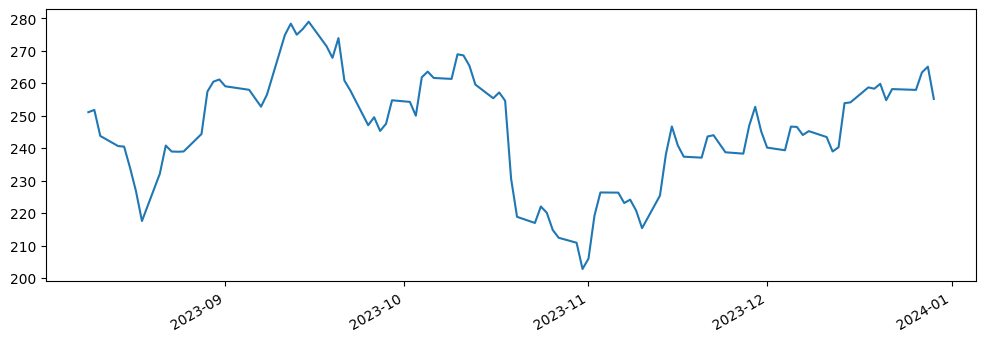

In [11]:
df_tesla['2. high'].plot(figsize=(12,4))

In [12]:
df_tesla.rename(columns=lambda x: x.split('. ')[-1], inplace=True)

In [13]:
df_tesla.head()

,open,high,low,close,volume
2023-12-29,255.10,255.19,247.43,248.48,100891578
2023-12-28,263.66,265.13,252.71,253.18,113619943
2023-12-27,258.35,263.34,257.52,261.44,105853348
2023-12-26,254.49,257.97,252.91,256.61,86892382
2023-12-22,256.76,258.22,251.37,252.54,93370094


<Axes: >

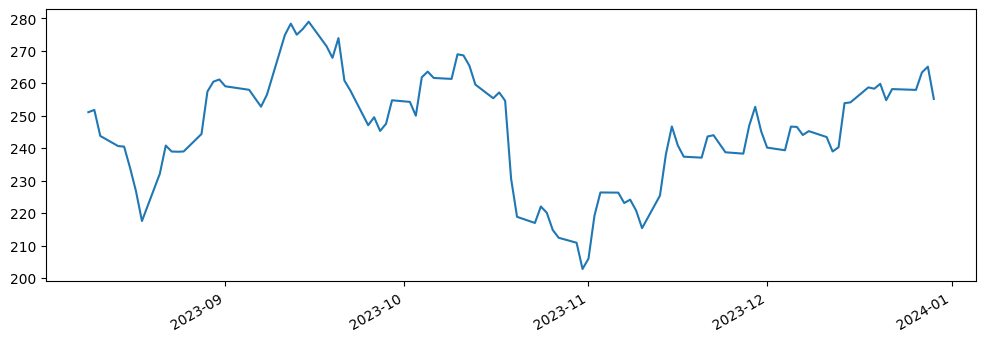

In [14]:
df_tesla['high'].plot(figsize=(12,4))

Giving x and y limits

In [15]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-12-29 to 2023-08-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [16]:
df_tesla.shape

(100, 5)

<Axes: >

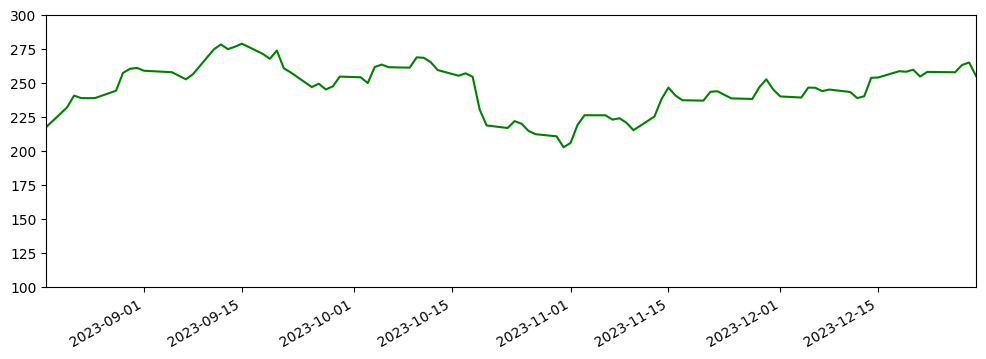

In [17]:
## xlimit and y limit and coloring
df_tesla['high'].plot(xlim=['2023-08-18','2023-12-29'],ylim=[100,300],figsize=(12,4), color='green')

<Axes: >

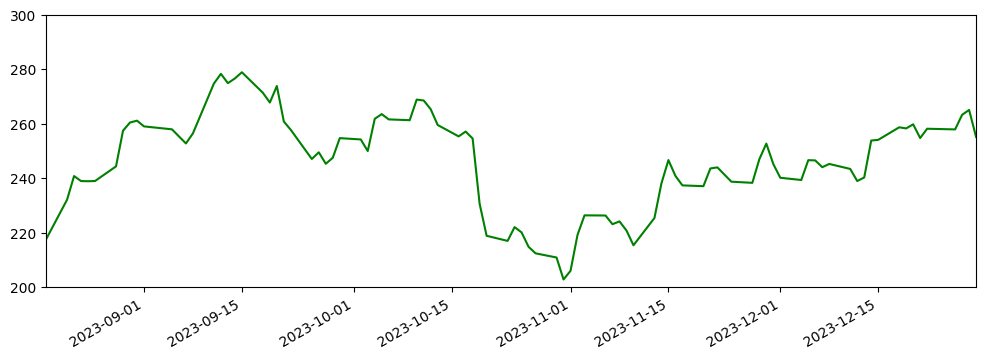

In [18]:
## xlimit and y limit and coloring
df_tesla['high'].plot(xlim=['2023-08-18','2023-12-29'],ylim=[200,300],figsize=(12,4), color='green')

In [19]:
df_tesla.index

DatetimeIndex(['2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26',
               '2023-12-22', '2023-12-21', '2023-12-20', '2023-12-19',
               '2023-12-18', '2023-12-15', '2023-12-14', '2023-12-13',
               '2023-12-12', '2023-12-11', '2023-12-08', '2023-12-07',
               '2023-12-06', '2023-12-05', '2023-12-04', '2023-12-01',
               '2023-11-30', '2023-11-29', '2023-11-28', '2023-11-27',
               '2023-11-24', '2023-11-22', '2023-11-21', '2023-11-20',
               '2023-11-17', '2023-11-16', '2023-11-15', '2023-11-14',
               '2023-11-13', '2023-11-10', '2023-11-09', '2023-11-08',
               '2023-11-07', '2023-11-06', '2023-11-03', '2023-11-02',
               '2023-11-01', '2023-10-31', '2023-10-30', '2023-10-27',
               '2023-10-26', '2023-10-25', '2023-10-24', '2023-10-23',
               '2023-10-20', '2023-10-19', '2023-10-18', '2023-10-17',
               '2023-10-16', '2023-10-13', '2023-10-12', '2023-10-11',
      

We got all dates from this

Now let's say we are seeing some specific index

In [21]:
df_reverse = df_tesla.iloc[::-1]

In [23]:
share_open=df_reverse.loc['2023-12-28':'2023-08-14']['open']

In [24]:
share_open

Series([], Name: open, dtype: float64)

In [26]:
index=df_reverse.loc['2023-12-28':'2023-08-14'].index

In [27]:
index

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [28]:
df_reverse.loc['2023-12-28':'2023-08-14'].index

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [29]:
df_reverse.head()

,open,high,low,close,volume
2023-08-09,250.87,251.10,241.90,242.19,101596324
2023-08-10,245.40,251.80,243.00,245.34,109498608
2023-08-11,241.77,243.79,238.02,242.65,99038642
2023-08-14,235.70,240.66,233.75,239.76,98595331
2023-08-15,238.73,240.50,232.61,232.96,88197599


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

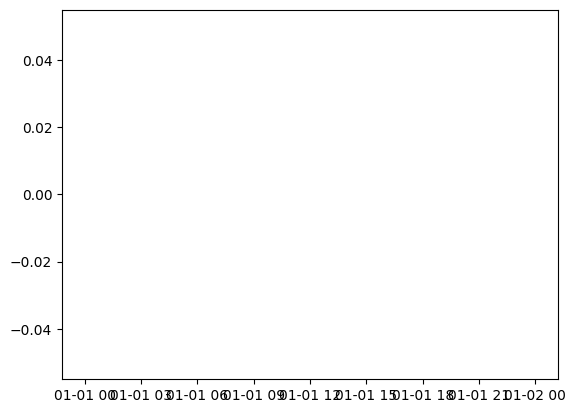

In [31]:
figure,axis= plt.subplots()
axis.plot(index, share_open)